<h1 align = 'center'> Handling Missing Data</h1>

Ways To handle Missing data:
  1. Remove entire column
  2. Impute the data
      1. Univariate
          - Numerical 
              - Mean/Median
              - Random Value
              - End of Distribution
          - Categorical
               - Most Frequent 
               - Missing Value
      2. Multivariate
          - KNN Imputer
          - Itrative Impute(MICE)

### __Complete Case Analysis__
- Also called __list-wise deletion__ of cases
- Consists in discarding observation(row) where value in any of the variable (column value)are missing.
- CCA means Literally analyzing only those obsevation for which there is information in all the variable in datsets is available

 #### Asumption for CCA

- Data Should be missing  completly at random (MCAR)Place. 
- It not use when whole data is missing at the end of the data set, or at the biggining of dataset

#### Advantage of CCA

1. Easy to implement as no data manipulation required
2. Preserve Variable Distribution(if Data is MCAR, then the sistribution of the variable of the reduced dataset should match the distribution of original dataset)

#### Disadvantage of CCA

1. It can Exclude the large fraction of original dataset(if missing data is abundant)
2. Excluded obserations could be informative for the analysis (if data is not missing at random)
3. When using our models in production, the model will not know how to handle missing data

#### When to use CCA?

1. When MCAR(Missing Data At Random)
2. Not a rule but generally it use when <5% data is missing
 

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('data_science_job.csv')

In [6]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,20.0,NaN,NaN,36.0,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,47.0,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5.0,NaN,NaN,83.0,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,0.0,NaN,Pvt Ltd,52.0,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,8.0,0.0


In [7]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index     479
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
training_hours             766
target                       0
dtype: int64

In [15]:
(df.isnull().mean()*100)

enrollee_id                0.000000
city                       0.000000
city_development_index     2.500261
gender                    23.530640
relevent_experience        0.000000
enrolled_university        2.014824
education_level            2.401086
major_discipline          14.683161
experience                 0.339284
company_size              30.994885
company_type              32.049274
training_hours             3.998330
target                     0.000000
dtype: float64

<AxesSubplot:ylabel='None'>

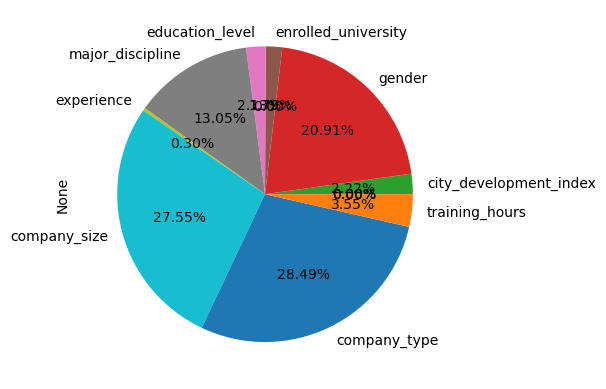

In [14]:
(df.isnull().mean()*100).plot(kind='pie', autopct='%.2f%%')

In [16]:
df.shape

(19158, 13)

- let's only delete thoes rows which have missing data <5%

In [18]:
cols = [var for var in df.columns if df[var].isnull().mean()<0.05 and df[var].isnull().mean() >0]

In [19]:
cols

['city_development_index',
 'enrolled_university',
 'education_level',
 'experience',
 'training_hours']

In [20]:
df[cols].head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
3,0.789,NaN,Graduate,0.0,52.0
4,0.767,no_enrollment,Masters,20.0,8.0


### Lets find how much data will be remain after CCA


In [22]:
len(df[cols].dropna())/len(df)

0.8968577095730244

In [23]:
new_df = df[cols].dropna()
df.shape, new_df.shape

((19158, 13), (17182, 5))

In [26]:
new_df.head()

,city_development_index,enrolled_university,education_level,experience,training_hours
0,0.920,no_enrollment,Graduate,20.0,36.0
1,0.776,no_enrollment,Graduate,15.0,47.0
2,0.624,Full time course,Graduate,5.0,83.0
4,0.767,no_enrollment,Masters,20.0,8.0
5,0.764,Part time course,Graduate,11.0,24.0


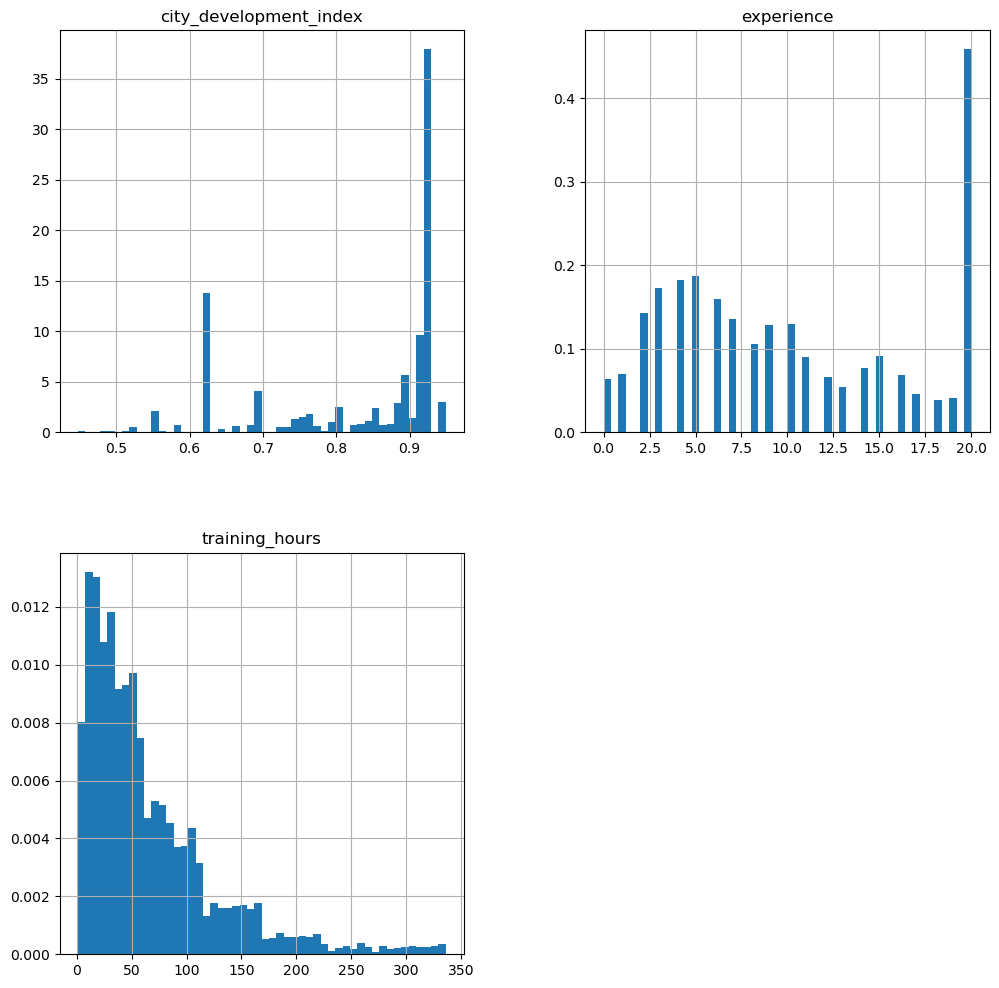

In [24]:
new_df.hist(bins= 50, density=True, figsize=(12,12))
plt.show()

- We should always check distribution befor and after Deleting data

<AxesSubplot:>

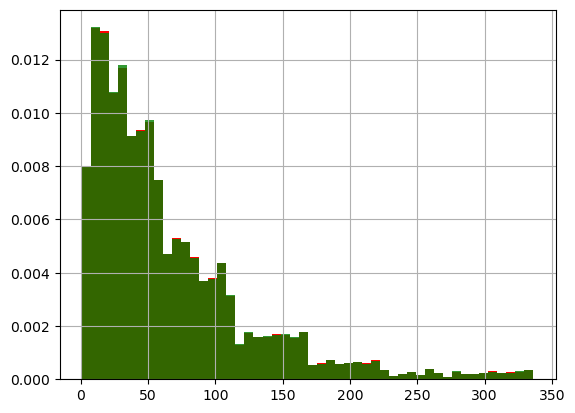

In [29]:
fig= plt.figure()
ax = fig.add_subplot(111)

#Original Data
df['training_hours'].hist(bins=50,ax=ax, density = True, color = 'red')

#data after cca, the argument: alpha make color transpeent
# so that we can see 2 distribution
new_df['training_hours'].hist(bins=50, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

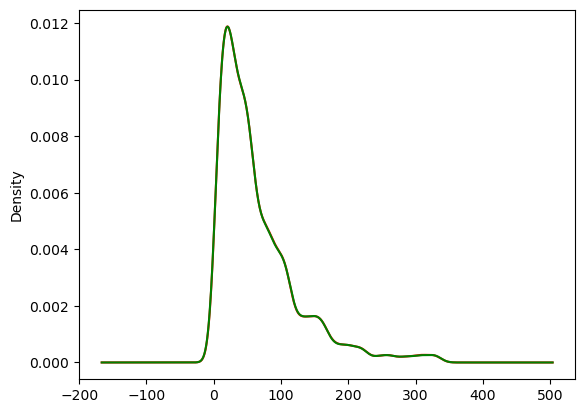

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original Data
df['training_hours'].plot.density(color='red')

#Data After CCA
new_df['training_hours'].plot.density(color='green')

- As PDF and Distribution completly overlap for before and after CCA

<AxesSubplot:>

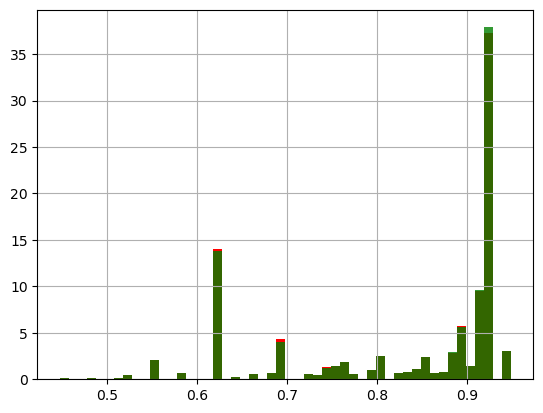

In [31]:
fig= plt.figure()
ax = fig.add_subplot(111)

#Original Data
df['city_development_index'].hist(bins=50,ax=ax, density = True, color = 'red')

#data after cca, the argument: alpha make color transpeent
# so that we can see 2 distribution
new_df['city_development_index'].hist(bins=50, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

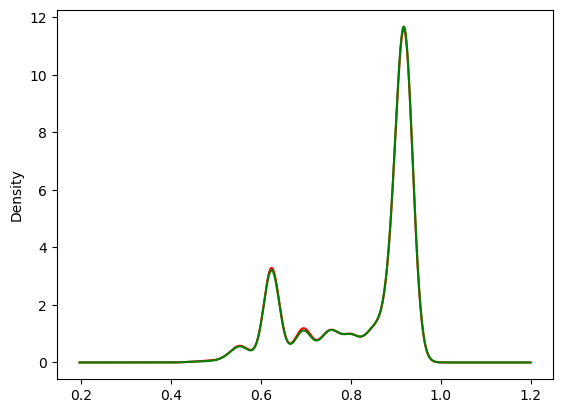

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original Data
df['city_development_index'].plot.density(color='red')

#Data After CCA
new_df['city_development_index'].plot.density(color='green')

<AxesSubplot:>

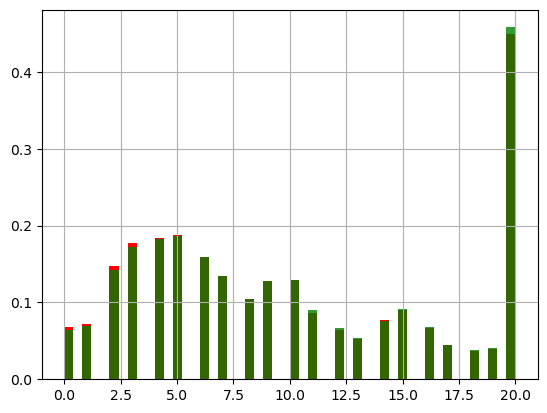

In [34]:
fig= plt.figure()
ax = fig.add_subplot(111)

#Original Data
df['experience'].hist(bins=50,ax=ax, density = True, color = 'red')

#data after cca, the argument: alpha make color transpeent
# so that we can see 2 distribution
new_df['experience'].hist(bins=50, color='green', density=True, alpha=0.8)

<AxesSubplot:ylabel='Density'>

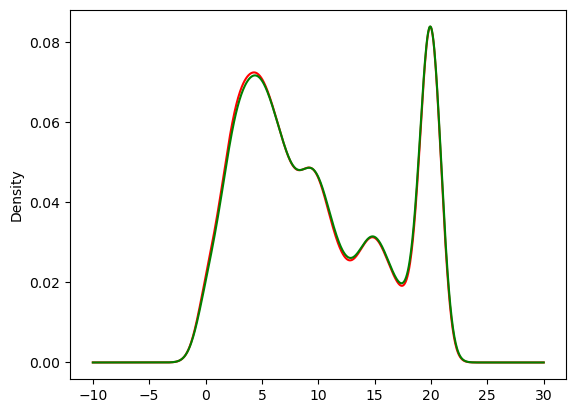

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)

#Original Data
df['experience'].plot.density(color='red')

#Data After CCA
new_df['experience'].plot.density(color='green')

#### Categorical Column

- For categorical variable we check ration of classes before and after CCA

In [35]:
df['enrolled_university'].value_counts()

no_enrollment       13817
Full time course     3757
Part time course     1198
Name: enrolled_university, dtype: int64

In [36]:
temp = pd.concat([
    #Persentage of observation per category, original data
    df['enrolled_university'].value_counts()/len(df),
    
    #Percentage of observations per category, cca data
    new_df['enrolled_university'].value_counts()/len(new_df)
], axis=1)

#add column names
temp.columns=['original','CCA']
temp

,original,CCA
no_enrollment,0.721213,0.735188
Full time course,0.196106,0.200733
Part time course,0.062533,0.064079


In [37]:
temp = pd.concat([
    #Persentage of observation per category, original data
    df['education_level'].value_counts()/len(df),
    
    #Percentage of observations per category, cca data
    new_df['education_level'].value_counts()/len(new_df)
], axis=1)

#add column names
temp.columns=['original','CCA']
temp

,original,CCA
Graduate,0.605387,0.619835
Masters,0.227633,0.234082
High School,0.105282,0.107380
Phd,0.021610,0.022116
Primary School,0.016077,0.016587
